In [38]:
%matplotlib inline

In [39]:
import numpy as np
from matplotlib import pyplot as plt

In [40]:
# length, width, type (0, 1), will do classification
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_data = [4.5, 1]

In [42]:
def sigmoid(val):
    return 1 / (1 + np.exp(-val))

# for sigmoid derivative
def sigmoid_prime(val):
    return sigmoid(val) * (1 - sigmoid(val))

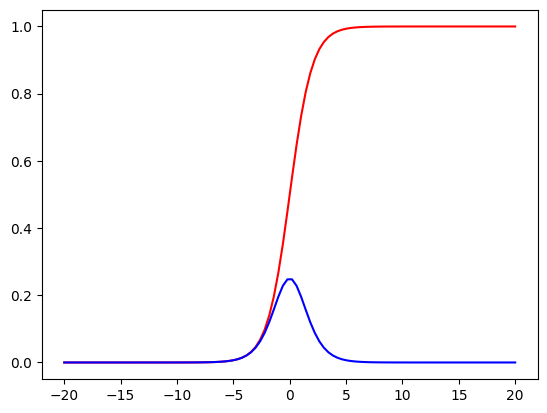

In [43]:
# Testing sigmoid and sigmoid_prime
T = np.linspace(-20,20,100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_prime(T), c='b')

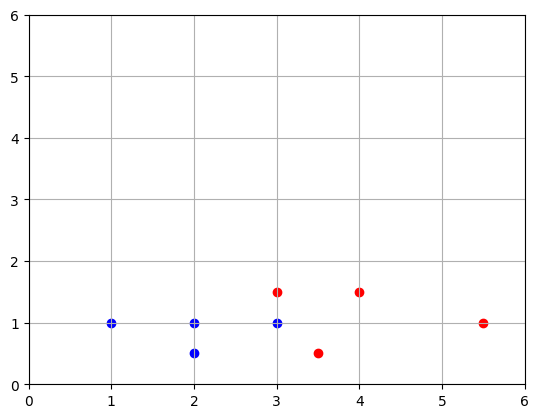

In [36]:
# scatter data
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
    # 0 for blue(default) and 1 for red
    point = data[i] 
    color = 'r' if point[2] == 1 else 'b'
    plt.scatter(point[0], point[1], c=color)
# data is not diverse nor well structure

6.740484663162937 3.054754364863198 -24.618743549209576


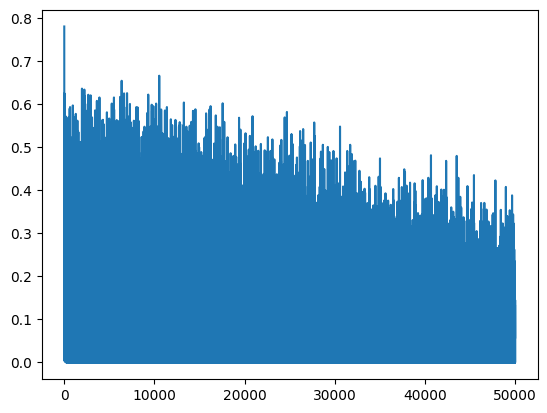

In [75]:
def train():
    # init
    learning_rate = 0.2
    costs = []
    steps = 50000
    
    # setting all weights & biase
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    
    for i in range(steps):
        ri = np.random.randint(len(data))
        point = data[ri]
        z = (point[0] * w1) + (point[1] * w2) + b
        prediction = sigmoid(z)
        actual = point[2]
        cost = np.square(prediction - actual)
        
        # to plot
        costs.append(cost)
        
        # Derivative from cost to w & b hierarchical
        dcost_dpre = 2 * (prediction - actual) 
        dpre_dz = sigmoid_prime(z)
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        # Change rule
        dcost_dz = dcost_dpre * dpre_dz
        dcost_dw1 = dcost_dz * dz_dw1 #simply read like this dcost_dpre <=> dpre_dz <=> dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        # Updating params
        w1 = w1 - (learning_rate * dcost_dw1)
        w2 = w2 - (learning_rate * dcost_dw2)
        b = b - (learning_rate * dcost_db)
    return costs, w1, w2, b
    
    

costs, w1, w2, b = train()
plt.plot(costs)
print(w1, w2, b)
# since the data is not diverse or well structure 0.2 learning rate with 50K steps is good enough for this demo